# Conociendo nuestros datos: palmerpenguins

Estos datos son sobre pingüinos y provienen de [The Palmer Long-Term Ecological Research (LTER)](https://pallter.marine.rutgers.edu/), que se dedican a colectar datos sobre la flora y fauna en la Antártida. Un caso especifico son los [**pingüinos**](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

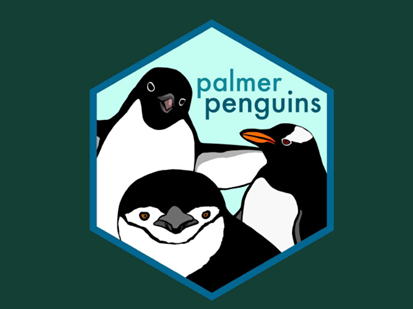

Este set de datos tiene una gran aplicación para hacer análisis de datos, además que ayuda a entender ciertos parámetros que necesitamos para el análisis exploratorio de datos.

## Especies
En particular se dedicaron a tomar muestras de 3 especies:
1. Chinstrapi
2. Gentoo
3. Adêlie

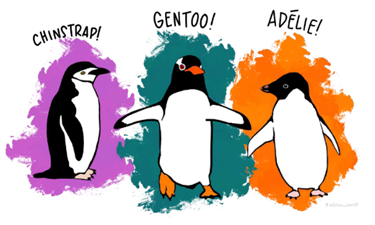

Algo particular de los pingüinos diferente a otros animales, es la determinación del sexo; pues requiere de análisis de sangre y otros parámetros, para poder determinarlo. Así los investigadores se pusieron a indagar para poder ayudar a determinar.

**Longitud del pico [Bill length]** y **altura de pico [bill depth]** son parámetros que se midieron, ademas de otros parámetros. Así apoyándose de estos datos y de pruebas genéticas relacionaron los datos con su determinado sexo, para después con el análisis de datos hacer una correlación y de esta manera poder predecir mediante las medidas de ciertos parámetros; si un pingüino es macho o hembra.

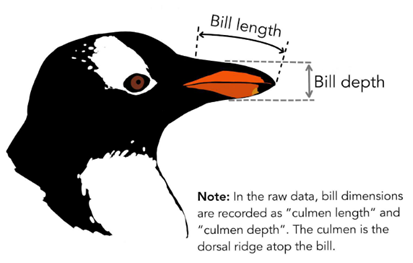

In [4]:
# Importando librerías 
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de las gráficas

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos
Utilizando el paquete [`palmerpenguins`](https://allisonhorst.github.io/palmerpenguins/)      
### Datos crudos

Esta forma de integración es mediante el desarrollo de un paquete (alguien hizo la integración a una librería) mediante 
`palmerpenguins`.

**NOTA**: Para borrar las barras laterales de Deepnote ocupamos `shift + .` o en MAC `command + .`

mediante la siguiente estructura traemos los datos crudos que los investigadores colectaron:

```js
raw_penguins_df = palmerpenguins.load_penguins_raw()
```

In [5]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


Estos son todos los datos de mi set, me permite ver todas las categorías que hay dentro de el.

**NOTA:** En deepnote una función bastante util es que nos da un breve resumen estadístico de ciertas columnas, es muy util para un breve vistazo

### Datos previamente procesados

In [6]:
preprocessed_penguins_df = palmerpenguins.load_penguins()
preprocessed_penguins_df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


Este conjunto de datos ya se le aplicó un tipo de limpieza para quitar datos anómalos. Gracias a la linea de código anterior tenemos este tipo de datos dentro de una variable:

```js
preprocessed_penguins_df = palmerpenguins.load_penguins()
```

En Deepnote nos aparecen algunas leyendas en rojo con la palabra `missing` que quiere decir **faltante**; es decir datos faltantes. En clases posteriores veremos como tratar este tipo de datos.

### Utilizando los conjuntos de datos de Seaborn

Otra manera de cargarlo es mediante la librería **Seaborn** con las siguientes lineas de programación:

```js
preprocessed_penguins_df = sns.load_dataset("penguins")
```

In [7]:
preprocessed_penguins_df = sns.load_dataset("penguins")

### Utilizando la interfaz de Deepnote o de tu programa
Para poder cargar los datos, necesitamos descargarlos y colocarlos en un directorio para poder acceder a ellos. Este proceso se realiza de forma manual y no requiere de ninguna librería para poder acceder a ellos, solamente necesitamos acceder mediante un archivo tipo (csv,xls,..., entre otros)

Links de importación de datos:
- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).

- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

### Datos Crudos
Deepnote ofrece subir archivos por URL, además de que una vez se ha subido el documento, podemos consultarlo dando doble clic y visualizar ciertos parámetros estadísticos, inclusive podemos filtrar la información.

Ahora lo usaremos dentro de una celda de código con pandas con:
```python
#Cargando o leyendo datos
raw_penguins_df2 = pd.read_csv('dataset/penguins_raw.csv')
#Desplegando
raw_penguins_df2
```

In [8]:
raw_penguins_df2 = pd.read_csv('dataset/penguins_raw.csv')
raw_penguins_df2

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


### Datos Preprocesados

In [9]:
preprocessed_penguins_df2 = pd.read_csv('dataset/penguins.csv')
preprocessed_penguins_df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Así terminamos la clase, sobre como poder importar los datos y obtener de manera rápida alguna información de nuestro data set.

Este set de datos es el que trabajaremos en todo el curso.

Recuerda que un análisis de datos se basa en hacer preguntas, así que trata de preguntarte cosas sobre lo que vas a trabajar; en este caso pingüinos. Podremos preguntarnos, ¿como fue su proceso evolutivo? ¿Cuántas especies distintas hay? ¿Qué diferencia a cada especie? etc.

De esta manera es bueno mostrar interés en los datos que vamos a analizar para que sea un proceso mas natural, así podemos realizar las siguientes preguntas:
- ¿sera posible determinar el sexo de un pingüino por las medidas de su pico?
- ¿qué tanto puede vivir un pingüino?
- ¿qué tanto puede pesar un pingüino?

Es bueno tener este tipo de preguntas, dado que conforme pase el proceso de análisis, podemos regresar y dar respuesta a ese tipo de preguntas.

#### Preguntas:
- ¿Cuantos años en promedio vive un pingüino?
- ¿Las hembras viven mas que los machos?
- ¿Cuál es el rasgo más importante para definir el sexo de un pingüino?
- ¿Existe una relación de tamaño en cuerpo o algún elemento en el pingüino para que sea hembra?
- De esas 3 especies ¿una de ellas es mas grande que las demás?
- ¿Existe una relación entre tamaño y edad?
- ¿En que parte o isla hay una mayor población de pingüinos?
- ¿Existe una relación entre el sexo y el lugar (isla) que predomine? 
- ¿Qué especie es más común?